Data Exploration IPEDS: Trends in Staffing 
Case Study: Yale

Institutional Characteristics, Student FTE, Staff FTE
Fall 2002 - Spring 2022

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio



Uploading master merged dataset.

In [3]:
df = pd.read_csv("ic_student_staff_master.csv",low_memory=False,encoding = "ISO-8859-1")
df['year'] = pd.to_datetime(df.year,format='%Y')
df['year'] = df['year'].dt.strftime('%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55959 entries, 0 to 55958
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     55959 non-null  int64  
 1   instnm                                     55959 non-null  object 
 2   addr                                       55725 non-null  object 
 3   city                                       55959 non-null  object 
 4   stabbr                                     55959 non-null  object 
 5   zip                                        55959 non-null  object 
 6   obereg                                     55959 non-null  object 
 7   sector                                     55959 non-null  object 
 8   iclevel                                    55959 non-null  object 
 9   control                                    55959 non-null  object 
 10  deggrant              

Setting up comparison frames

In [4]:
print(df['carnegie_grouped'].unique())

['Doctoral or Research Universities' 'Masters Colleges and Universities'
 'Associates Colleges' 'Baccalaureate Colleges and Universities'
 'Specialized Institutions']


Create dataframes for comparison:
1. Yale
2. Ivy 
3. Peers  

In [5]:
yale = df[df['unitid']==130794]
yale = yale.reset_index(drop=True)
yale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     20 non-null     int64  
 1   instnm                                     20 non-null     object 
 2   addr                                       17 non-null     object 
 3   city                                       20 non-null     object 
 4   stabbr                                     20 non-null     object 
 5   zip                                        20 non-null     object 
 6   obereg                                     20 non-null     object 
 7   sector                                     20 non-null     object 
 8   iclevel                                    20 non-null     object 
 9   control                                    20 non-null     object 
 10  deggrant                    

In [6]:
ivy = df[df['ivy league']=='ivy']
ivy = ivy.reset_index(drop=True)
ivy.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     160 non-null    int64  
 1   instnm                                     160 non-null    object 
 2   addr                                       148 non-null    object 
 3   city                                       160 non-null    object 
 4   stabbr                                     160 non-null    object 
 5   zip                                        160 non-null    object 
 6   obereg                                     160 non-null    object 
 7   sector                                     160 non-null    object 
 8   iclevel                                    160 non-null    object 
 9   control                                    160 non-null    object 
 10  deggrant                  

In [7]:
phd = df[df['carnegie_grouped']=='Doctoral or Research Universities']
phd = phd.reset_index(drop=True)
phd.head(2)

,unitid,instnm,addr,city,stabbr,zip,obereg,sector,iclevel,control,...,total instruction pt,total instruction staff fte,total non instruction,total non instruction ft,total non instruction pt,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,ivy league
0,100654,Alabama A & M University,4107 MERIDIAN ST,NORMAL,AL,35762,Southeast,4-year public,Four or more years,Public,...,84.0,320.0,842.0,722.0,120.0,762.0,4.86,16.44,6.90,not an ivy
1,100663,University Of Alabama At Birmingham,ADMINISTRATION BLDG SUITE 1070,BIRMINGHAM,AL,35294-0110,Southeast,4-year public,Four or more years,Public,...,84.0,959.0,3666.0,2790.0,876.0,3082.0,3.06,12.88,4.01,not an ivy


Yale - Percentage Change - FTE
1. Annual

In [8]:
yale_pct_change = yale[['unitid','year','student fte','total staff fte','total instruction staff fte','total non instruction staff fte','student fte per staff fte','student fte per instruction staff fte','student fte per non instruction staff fte']]
yale_pct_change = yale_pct_change.reset_index(drop=True)
yale_pct_change.head(2)

,unitid,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte
0,130794,2002,11261,5588.0,1309.0,4279.0,2.02,8.60,2.63
1,130794,2003,10654,5924.0,1422.0,4502.0,1.80,7.49,2.37


In [9]:
yale_pct_change['student fte pct change'] = yale_pct_change['student fte'].pct_change()
yale_pct_change['student fte pct change'] = (yale_pct_change['student fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change['staff fte pct change'] = yale_pct_change['total staff fte'].pct_change()
yale_pct_change['staff fte pct change'] = (yale_pct_change['staff fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change['instruction fte pct change'] = yale_pct_change['total instruction staff fte'].pct_change()
yale_pct_change['instruction fte pct change'] = (yale_pct_change['instruction fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change['non instruction fte pct change'] = yale_pct_change['total non instruction staff fte'].pct_change()
yale_pct_change['non instruction fte pct change'] = (yale_pct_change['non instruction fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change = yale_pct_change.fillna(0.00)

Yale - Percentage Change - FTE
2. Cumulative

In [10]:
yale_base_student = 11261
base_date = '2002-01-01'

def yale_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte']-yale_base_student)/yale_base_student)*100)
    else:
        return 0.0
    
yale_pct_change['student pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_student(row), axis=1)
yale_pct_change['student pct change cumulative'] = yale_pct_change['student pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)
#print(yale_pct_change)

In [11]:
yale_base_staff = 5588.0
base_date = '2002-01-01'

def yale_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['total staff fte']-yale_base_staff)/yale_base_staff)*100)
    else:
        return 0.0
    
yale_pct_change['staff pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_staff(row), axis=1)
yale_pct_change['staff pct change cumulative'] = yale_pct_change['staff pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)
#print(yale_pct_change)

In [12]:
yale_base_instruction = 1309.0
base_date = '2002-01-01'

def yale_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total instruction staff fte']-yale_base_instruction)/yale_base_instruction)*100)
    else:
        return 0.0
    
yale_pct_change['instruction pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_instruction(row), axis=1)
yale_pct_change['instruction pct change cumulative'] = yale_pct_change['instruction pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

In [13]:
yale_base_non_instruction = 4279.0
base_date = '2002-01-01'

def yale_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total non instruction staff fte']-yale_base_non_instruction)/yale_base_non_instruction)*100)
    else:
        return 0.0
    
yale_pct_change['non instruction pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_non_instruction(row), axis=1)
yale_pct_change['non instruction pct change cumulative'] = yale_pct_change['non instruction pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

yale_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     20 non-null     int64  
 1   year                                       20 non-null     object 
 2   student fte                                20 non-null     int64  
 3   total staff fte                            20 non-null     float64
 4   total instruction staff fte                20 non-null     float64
 5   total non instruction staff fte            20 non-null     float64
 6   student fte per staff fte                  20 non-null     float64
 7   student fte per instruction staff fte      20 non-null     float64
 8   student fte per non instruction staff fte  20 non-null     float64
 9   student fte pct change                     20 non-null     float64
 10  staff fte pct change        

Yale - Percentage Change - Ratio 
1. Annual

In [14]:
yale_pct_change['student staff ratio pct change'] = yale_pct_change['student fte per staff fte'].pct_change()
yale_pct_change['student staff ratio pct change'] = (yale_pct_change['student staff ratio pct change']*100).round(2)

yale_pct_change['student instruction staff ratio pct change'] = yale_pct_change['student fte per instruction staff fte'].pct_change()
yale_pct_change['student instruction staff ratio pct change'] = (yale_pct_change['student instruction staff ratio pct change']*100).round(2)

yale_pct_change['student non instruction staff ratio pct change'] = yale_pct_change['student fte per non instruction staff fte'].pct_change()
yale_pct_change['student non instruction staff ratio pct change'] = (yale_pct_change['student non instruction staff ratio pct change']*100).round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

Yale - Percentage Change - Ratio 
1. Cumulative

In [15]:
yale_base_staff_ratio = 2.02
base_date = '2002-01-01'

def yale_pct_change_period_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per staff fte']-yale_base_staff_ratio)/yale_base_staff_ratio)*100)
    else:
        return 0.0
    
yale_pct_change['student staff ratio pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_staff_ratio(row), axis=1)
yale_pct_change['student staff ratio pct change cumulative'] = yale_pct_change['student staff ratio pct change cumulative'].round(2)


In [16]:
yale_base_instruction_staff_ratio = 8.60
base_date = '2002-01-01'

def yale_pct_change_period_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per instruction staff fte']-yale_base_instruction_staff_ratio)/yale_base_instruction_staff_ratio)*100)
    else:
        return 0.0
    
yale_pct_change['student instruction staff ratio pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_instruction_staff_ratio(row), axis=1)
yale_pct_change['student instruction staff ratio pct change cumulative'] = yale_pct_change['student instruction staff ratio pct change cumulative'].round(2)

In [17]:
yale_base_non_instruction_staff_ratio = 2.63
base_date = '2002-01-01'

def yale_pct_change_period_non_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per non instruction staff fte']-yale_base_non_instruction_staff_ratio)/yale_base_non_instruction_staff_ratio)*100)
    else:
        return 0.0
    
yale_pct_change['student non instruction staff ratio pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_non_instruction_staff_ratio(row), axis=1)
yale_pct_change['student non instruction staff ratio pct change cumulative'] = yale_pct_change['student non instruction staff ratio pct change cumulative'].round(2)

In [18]:
yale_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   unitid                                                     20 non-null     int64  
 1   year                                                       20 non-null     object 
 2   student fte                                                20 non-null     int64  
 3   total staff fte                                            20 non-null     float64
 4   total instruction staff fte                                20 non-null     float64
 5   total non instruction staff fte                            20 non-null     float64
 6   student fte per staff fte                                  20 non-null     float64
 7   student fte per instruction staff fte                      20 non-null     float64
 8   student fte 

Yale - Restacking datasets - by type
1. FTE Total, FTE Percentage Chanage - Annual, FTE Percentage Chanage - Cumulative
2. Ratio Total, Ratio Percentage Chanage - Annual, Ratio Percentage Chanage - Cumulative

In [19]:
cols_fte = ['unitid','year','fte','fte pct change','fte pct change cumulative','type']

yale_fte_pct_change_total_student = yale_pct_change[['unitid','year','student fte','student fte pct change','student pct change cumulative']]
yale_fte_pct_change_total_student = yale_fte_pct_change_total_student.reset_index(drop=True)
yale_fte_pct_change_total_student["type"] = "student"
yale_fte_pct_change_total_student.columns = cols_fte
yale_fte_pct_change_total_student = yale_fte_pct_change_total_student.reset_index(drop=True)
#yale_pct_change_total_student.head(2)

yale_fte_pct_change_total_staff = yale_pct_change[['unitid','year','total staff fte','staff fte pct change','staff pct change cumulative']]
yale_fte_pct_change_total_staff = yale_fte_pct_change_total_staff.reset_index(drop=True)
yale_fte_pct_change_total_staff["type"] = "all staff"
yale_fte_pct_change_total_staff.columns = cols_fte
yale_fte_pct_change_total_staff = yale_fte_pct_change_total_staff.reset_index(drop=True)
#yale_pct_change_total_staff.head(2)

yale_fte_pct_change_total_instruction = yale_pct_change[['unitid','year','total instruction staff fte','instruction fte pct change','instruction pct change cumulative']]
yale_fte_pct_change_total_instruction = yale_fte_pct_change_total_instruction.reset_index(drop=True)
yale_fte_pct_change_total_instruction["type"] = "instructional staff"
yale_fte_pct_change_total_instruction.columns = cols_fte
yale_fte_pct_change_total_instruction = yale_fte_pct_change_total_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_fte_pct_change_total_non_instruction = yale_pct_change[['unitid','year','total non instruction staff fte','non instruction fte pct change','non instruction pct change cumulative']]
yale_fte_pct_change_total_non_instruction = yale_fte_pct_change_total_non_instruction.reset_index(drop=True)
yale_fte_pct_change_total_non_instruction["type"] = "non instructional staff"
yale_fte_pct_change_total_non_instruction.columns = cols_fte
yale_fte_pct_change_total_non_instruction = yale_fte_pct_change_total_non_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_fte_pct_change_by_type = pd.concat([yale_fte_pct_change_total_student,yale_fte_pct_change_total_staff,yale_fte_pct_change_total_instruction,yale_fte_pct_change_total_non_instruction],ignore_index=False)
yale_fte_pct_change_by_type=yale_fte_pct_change_by_type.reset_index(drop=True)

yale_fte_pct_change_by_type.head(2)

,unitid,year,fte,fte pct change,fte pct change cumulative,type
0,130794,2002,11261.0,0.00,0.00,student
1,130794,2003,10654.0,-5.39,-5.39,student


In [20]:
cols_ratio = ['unitid','year','student fte per staff fte','ratio pct change','ratio pct change cumulative','type']

yale_ratio_pct_change_total_staff = yale_pct_change[['unitid','year','student fte per staff fte','student staff ratio pct change','student staff ratio pct change cumulative']]
yale_ratio_pct_change_total_staff = yale_ratio_pct_change_total_staff.reset_index(drop=True)
yale_ratio_pct_change_total_staff["type"] = "all staff"
yale_ratio_pct_change_total_staff.columns = cols_ratio
yale_ratio_pct_change_total_staff = yale_ratio_pct_change_total_staff.reset_index(drop=True)
#yale_pct_change_total_staff.head(2)

yale_ratio_pct_change_total_instruction = yale_pct_change[['unitid','year','student fte per instruction staff fte','student instruction staff ratio pct change','student instruction staff ratio pct change cumulative']]
yale_ratio_pct_change_total_instruction = yale_ratio_pct_change_total_instruction.reset_index(drop=True)
yale_ratio_pct_change_total_instruction["type"] = "instructional staff"
yale_ratio_pct_change_total_instruction.columns = cols_ratio
yale_ratio_pct_change_total_instruction = yale_ratio_pct_change_total_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_ratio_pct_change_total_non_instruction = yale_pct_change[['unitid','year','student fte per non instruction staff fte','student non instruction staff ratio pct change','student non instruction staff ratio pct change cumulative']]
yale_ratio_pct_change_total_non_instruction = yale_ratio_pct_change_total_non_instruction.reset_index(drop=True)
yale_ratio_pct_change_total_non_instruction["type"] = "non instructional staff"
yale_ratio_pct_change_total_non_instruction.columns = cols_ratio
yale_ratio_pct_change_total_non_instruction = yale_ratio_pct_change_total_non_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_ratio_pct_change_by_type = pd.concat([yale_ratio_pct_change_total_staff,yale_ratio_pct_change_total_instruction,yale_ratio_pct_change_total_non_instruction],ignore_index=False)
yale_ratio_pct_change_by_type=yale_ratio_pct_change_by_type.reset_index(drop=True)

yale_ratio_pct_change_by_type.head(2)

,unitid,year,student fte per staff fte,ratio pct change,ratio pct change cumulative,type
0,130794,2002,2.02,0.00,0.00,all staff
1,130794,2003,1.80,-10.89,-10.89,all staff


Ivy - FTE - Percentage Change
1. Annual

In [21]:
ivy_pct_change = ivy.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum','student fte per staff fte':'mean','student fte per instruction staff fte':'mean','student fte per non instruction staff fte':'mean'})
ivy_pct_change = ivy_pct_change.reset_index()
ivy_pct_change.columns = ['year','student fte','total staff fte','total instruction staff fte','total non instruction staff fte','student fte per staff fte','student fte per instruction staff fte','student fte per non instruction staff fte']
ivy_pct_change['student fte per staff fte'] = ivy_pct_change['student fte per staff fte'].round(2)
ivy_pct_change['student fte per instruction staff fte'] = ivy_pct_change['student fte per instruction staff fte'].round(2)
ivy_pct_change['student fte per non instruction staff fte'] = ivy_pct_change['student fte per non instruction staff fte'].round(2)

ivy_pct_change.head(2)

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte
0,2002,103916,49167.0,11127.0,38040.0,2.09,9.62,2.74
1,2003,115097,53538.0,12201.0,41336.0,2.15,9.51,2.80


In [22]:
ivy_pct_change['student fte pct change'] = ivy_pct_change['student fte'].pct_change()
ivy_pct_change['student fte pct change'] = (ivy_pct_change['student fte pct change']*100).round(2)
ivy_pct_change = ivy_pct_change.reset_index(drop=True)

ivy_pct_change['staff fte pct change'] = ivy_pct_change['total staff fte'].pct_change()
ivy_pct_change['staff fte pct change'] = (ivy_pct_change['staff fte pct change']*100).round(2)
ivy_pct_change = ivy_pct_change.reset_index(drop=True)

ivy_pct_change['instruction fte pct change'] = ivy_pct_change['total instruction staff fte'].pct_change()
ivy_pct_change['instruction fte pct change'] = (ivy_pct_change['instruction fte pct change']*100).round(2)
ivy_pct_change = ivy_pct_change.reset_index(drop=True)

ivy_pct_change['non instruction fte pct change'] = ivy_pct_change['total non instruction staff fte'].pct_change()
ivy_pct_change['non instruction fte pct change'] = (ivy_pct_change['non instruction fte pct change']*100).round(2)
ivy_pct_change = ivy_pct_change.reset_index(drop=True)

ivy_pct_change = ivy_pct_change.fillna(0.00)
ivy_pct_change.head(2)

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,student fte pct change,staff fte pct change,instruction fte pct change,non instruction fte pct change
0,2002,103916,49167.0,11127.0,38040.0,2.09,9.62,2.74,0.00,0.00,0.00,0.00
1,2003,115097,53538.0,12201.0,41336.0,2.15,9.51,2.80,10.76,8.89,9.65,8.66


Ivy - Percentage Change - FTE
2. Cumulative

In [23]:
ivy_base_student = 103916
base_date = '2002-01-01'

def ivy_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte']-ivy_base_student)/ivy_base_student)*100)
    else:
        return 0.0
    
ivy_pct_change['student pct change cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_student(row), axis=1)
ivy_pct_change['student pct change cumulative'] = ivy_pct_change['student pct change cumulative'].round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)
#print(yale_pct_change)

In [24]:
ivy_base_staff = 49167.0
base_date = '2002-01-01'

def ivy_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['total staff fte']-ivy_base_staff)/ivy_base_staff)*100)
    else:
        return 0.0
    
ivy_pct_change['staff pct change cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_staff(row), axis=1)
ivy_pct_change['staff pct change cumulative'] = ivy_pct_change['staff pct change cumulative'].round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)
#print(yale_pct_change)

In [25]:
ivy_base_instruction = 11127.0
base_date = '2002-01-01'

def yale_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total instruction staff fte']-ivy_base_instruction)/ivy_base_instruction)*100)
    else:
        return 0.0
    
ivy_pct_change['instruction pct change cumulative'] = ivy_pct_change.apply(lambda row: yale_pct_change_period_instruction(row), axis=1)
ivy_pct_change['instruction pct change cumulative'] = ivy_pct_change['instruction pct change cumulative'].round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)

In [26]:
ivy_base_non_instruction = 38040.0
base_date = '2002-01-01'

def ivy_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total non instruction staff fte']-ivy_base_non_instruction)/ivy_base_non_instruction)*100)
    else:
        return 0.0
    
ivy_pct_change['non instruction pct change cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_non_instruction(row), axis=1)
ivy_pct_change['non instruction pct change cumulative'] = ivy_pct_change['non instruction pct change cumulative'].round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)

ivy_pct_change.info()
ivy_pct_change.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       20 non-null     object 
 1   student fte                                20 non-null     int64  
 2   total staff fte                            20 non-null     float64
 3   total instruction staff fte                20 non-null     float64
 4   total non instruction staff fte            20 non-null     float64
 5   student fte per staff fte                  20 non-null     float64
 6   student fte per instruction staff fte      20 non-null     float64
 7   student fte per non instruction staff fte  20 non-null     float64
 8   student fte pct change                     20 non-null     float64
 9   staff fte pct change                       20 non-null     float64
 10  instruction fte pct change  

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,student fte pct change,staff fte pct change,instruction fte pct change,non instruction fte pct change,student pct change cumulative,staff pct change cumulative,instruction pct change cumulative,non instruction pct change cumulative
0,2002,103916,49167.0,11127.0,38040.0,2.09,9.62,2.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2003,115097,53538.0,12201.0,41336.0,2.15,9.51,2.80,10.76,8.89,9.65,8.66,10.76,8.89,9.65,8.66


Ivy - Percentage Change - Ratio 
1. Annual

In [27]:
ivy_pct_change['student staff ratio pct change'] = ivy_pct_change['student fte per staff fte'].pct_change()
ivy_pct_change['student staff ratio pct change'] = (ivy_pct_change['student staff ratio pct change']*100).round(2)

ivy_pct_change['student instruction staff ratio pct change'] = ivy_pct_change['student fte per instruction staff fte'].pct_change()
ivy_pct_change['student instruction staff ratio pct change'] = (ivy_pct_change['student instruction staff ratio pct change']*100).round(2)

ivy_pct_change['student non instruction staff ratio pct change'] = ivy_pct_change['student fte per non instruction staff fte'].pct_change()
ivy_pct_change['student non instruction staff ratio pct change'] = (ivy_pct_change['student non instruction staff ratio pct change']*100).round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)

Ivy - Percentage Change - Ratio 
1. Cumulative

In [28]:
ivy_base_staff_ratio = 2.09
base_date = '2002-01-01'

def ivy_pct_change_period_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per staff fte']-ivy_base_staff_ratio)/ivy_base_staff_ratio)*100)
    else:
        return 0.0
    
ivy_pct_change['student staff ratio pct change cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_staff_ratio(row), axis=1)
ivy_pct_change['student staff ratio pct change cumulative'] = ivy_pct_change['student staff ratio pct change cumulative'].round(2)


In [29]:
ivy_base_instruction_staff_ratio = 9.62
base_date = '2002-01-01'

def ivy_pct_change_period_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per instruction staff fte']-ivy_base_instruction_staff_ratio)/ivy_base_instruction_staff_ratio)*100)
    else:
        return 0.0
    
ivy_pct_change['student instruction staff ratio pct change cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_instruction_staff_ratio(row), axis=1)
ivy_pct_change['student instruction staff ratio pct change cumulative'] = ivy_pct_change['student instruction staff ratio pct change cumulative'].round(2)

In [30]:
ivy_base_non_instruction_staff_ratio = 2.74
base_date = '2002-01-01'

def ivy_pct_change_period_non_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per non instruction staff fte']-ivy_base_non_instruction_staff_ratio)/ivy_base_non_instruction_staff_ratio)*100)
    else:
        return 0.0
    
ivy_pct_change['student non instruction staff ratio pct change cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_non_instruction_staff_ratio(row), axis=1)
ivy_pct_change['student non instruction staff ratio pct change cumulative'] = ivy_pct_change['student non instruction staff ratio pct change cumulative'].round(2)

In [31]:
ivy_pct_change.head()

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,student fte pct change,staff fte pct change,...,student pct change cumulative,staff pct change cumulative,instruction pct change cumulative,non instruction pct change cumulative,student staff ratio pct change,student instruction staff ratio pct change,student non instruction staff ratio pct change,student staff ratio pct change cumulative,student instruction staff ratio pct change cumulative,student non instruction staff ratio pct change cumulative
0,2002,103916,49167.0,11127.0,38040.0,2.09,9.62,2.74,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2003,115097,53538.0,12201.0,41336.0,2.15,9.51,2.80,10.76,8.89,...,10.76,8.89,9.65,8.66,2.87,-1.14,2.19,2.87,-1.14,2.19
2,2004,113744,54571.0,14427.0,40144.0,2.10,8.25,2.83,-1.18,1.93,...,9.46,10.99,29.66,5.53,-2.33,-13.25,1.07,0.48,-14.24,3.28
3,2005,126223,53952.0,12883.0,41069.0,2.29,9.79,3.00,10.97,-1.13,...,21.47,9.73,15.78,7.96,9.05,18.67,6.01,9.57,1.77,9.49
4,2006,129747,55070.0,13451.0,41618.0,2.29,9.69,3.02,2.79,2.07,...,24.86,12.01,20.89,9.41,0.00,-1.02,0.67,9.57,0.73,10.22


Ivy - Restacking datasets - by type
1. FTE Total, FTE Percentage Chanage - Annual, FTE Percentage Chanage - Cumulative
2. Ratio Total, Ratio Percentage Chanage - Annual, Ratio Percentage Chanage - Cumulative

In [32]:
cols_fte_ivy = ['year','fte','fte pct change','fte pct change cumulative','type']

ivy_fte_pct_change_total_student = ivy_pct_change[['year','student fte','student fte pct change','student pct change cumulative']]
ivy_fte_pct_change_total_student = ivy_fte_pct_change_total_student.reset_index(drop=True)
ivy_fte_pct_change_total_student["type"] = "student"
ivy_fte_pct_change_total_student.columns = cols_fte_ivy
ivy_fte_pct_change_total_student = ivy_fte_pct_change_total_student.reset_index(drop=True)

ivy_fte_pct_change_total_staff = ivy_pct_change[['year','total staff fte','staff fte pct change','staff pct change cumulative']]
ivy_fte_pct_change_total_staff = ivy_fte_pct_change_total_staff.reset_index(drop=True)
ivy_fte_pct_change_total_staff["type"] = "all staff"
ivy_fte_pct_change_total_staff.columns = cols_fte_ivy
ivy_fte_pct_change_total_staff = ivy_fte_pct_change_total_staff.reset_index(drop=True)
#yale_pct_change_total_staff.head(2)

ivy_fte_pct_change_total_instruction = ivy_pct_change[['year','total instruction staff fte','instruction fte pct change','instruction pct change cumulative']]
ivy_fte_pct_change_total_instruction = ivy_fte_pct_change_total_instruction.reset_index(drop=True)
ivy_fte_pct_change_total_instruction["type"] = "instructional staff"
ivy_fte_pct_change_total_instruction.columns = cols_fte_ivy
ivy_fte_pct_change_total_instruction = ivy_fte_pct_change_total_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

ivy_fte_pct_change_total_non_instruction = ivy_pct_change[['year','total non instruction staff fte','non instruction fte pct change','non instruction pct change cumulative']]
ivy_fte_pct_change_total_non_instruction = ivy_fte_pct_change_total_non_instruction.reset_index(drop=True)
ivy_fte_pct_change_total_non_instruction["type"] = "non instructional staff"
ivy_fte_pct_change_total_non_instruction.columns = cols_fte_ivy
ivy_fte_pct_change_total_non_instruction = ivy_fte_pct_change_total_non_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

ivy_fte_pct_change_by_type = pd.concat([ivy_fte_pct_change_total_student,ivy_fte_pct_change_total_staff,ivy_fte_pct_change_total_instruction,ivy_fte_pct_change_total_non_instruction],ignore_index=False)
ivy_fte_pct_change_by_type=ivy_fte_pct_change_by_type.reset_index(drop=True)

ivy_fte_pct_change_by_type.head(2)

,year,fte,fte pct change,fte pct change cumulative,type
0,2002,103916.0,0.00,0.00,student
1,2003,115097.0,10.76,10.76,student


In [33]:
cols_ratio_ivy = ['year','student fte per staff fte','ratio pct change','ratio pct change cumulative','type']

ivy_ratio_pct_change_total_staff = ivy_pct_change[['year','student fte per staff fte','student staff ratio pct change','student staff ratio pct change cumulative']]
ivy_ratio_pct_change_total_staff = ivy_ratio_pct_change_total_staff.reset_index(drop=True)
ivy_ratio_pct_change_total_staff["type"] = "all staff"
ivy_ratio_pct_change_total_staff.columns = cols_ratio_ivy
ivy_ratio_pct_change_total_staff = ivy_ratio_pct_change_total_staff.reset_index(drop=True)
#ivy_ratio_pct_change_total_staff.head(2)

ivy_ratio_pct_change_total_instruction = ivy_pct_change[['year','student fte per instruction staff fte','student instruction staff ratio pct change','student instruction staff ratio pct change cumulative']]
ivy_ratio_pct_change_total_instruction = ivy_ratio_pct_change_total_instruction.reset_index(drop=True)
ivy_ratio_pct_change_total_instruction["type"] = "instructional staff"
ivy_ratio_pct_change_total_instruction.columns = cols_ratio_ivy
ivy_ratio_pct_change_total_instruction = ivy_ratio_pct_change_total_instruction.reset_index(drop=True)
#ivy_ratio_pct_change_total_instruction.head(2)

ivy_ratio_pct_change_total_non_instruction = ivy_pct_change[['year','student fte per non instruction staff fte','student non instruction staff ratio pct change','student non instruction staff ratio pct change cumulative']]
ivy_ratio_pct_change_total_non_instruction = ivy_ratio_pct_change_total_non_instruction.reset_index(drop=True)
ivy_ratio_pct_change_total_non_instruction["type"] = "non instructional staff"
ivy_ratio_pct_change_total_non_instruction.columns = cols_ratio_ivy
ivy_ratio_pct_change_total_non_instruction = ivy_ratio_pct_change_total_non_instruction.reset_index(drop=True)
#ivy_ratio_pct_change_total_non_instruction.head(2)

ivy_ratio_pct_change_by_type = pd.concat([ivy_ratio_pct_change_total_staff,ivy_ratio_pct_change_total_instruction,ivy_ratio_pct_change_total_non_instruction],ignore_index=False)
ivy_ratio_pct_change_by_type=ivy_ratio_pct_change_by_type.reset_index(drop=True)

ivy_ratio_pct_change_by_type.head(2)

,year,student fte per staff fte,ratio pct change,ratio pct change cumulative,type
0,2002,2.09,0.00,0.00,all staff
1,2003,2.15,2.87,2.87,all staff


Phd - FTE - Percentage Change
1. Annual

In [34]:
phd_pct_change = phd.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum','student fte per staff fte':'mean','student fte per instruction staff fte':'mean','student fte per non instruction staff fte':'mean'})
phd_pct_change = phd_pct_change.reset_index()
phd_pct_change.columns = ['year','student fte','total staff fte','total instruction staff fte','total non instruction staff fte','student fte per staff fte','student fte per instruction staff fte','student fte per non instruction staff fte']
phd_pct_change['student fte per staff fte'] = phd_pct_change['student fte per staff fte'].round(2)
phd_pct_change['student fte per instruction staff fte'] = phd_pct_change['student fte per instruction staff fte'].round(2)
phd_pct_change['student fte per non instruction staff fte'] = phd_pct_change['student fte per non instruction staff fte'].round(2)

phd_pct_change.head(2)

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte
0,2002,3900480,917224.0,264881.0,652367.0,4.98,15.35,7.73
1,2003,4188434,907763.0,260977.0,646815.0,5.30,16.40,8.27


In [35]:
phd_pct_change['student fte pct change'] = phd_pct_change['student fte'].pct_change()
phd_pct_change['student fte pct change'] = (phd_pct_change['student fte pct change']*100).round(2)
phd_pct_change = phd_pct_change.reset_index(drop=True)

phd_pct_change['staff fte pct change'] = phd_pct_change['total staff fte'].pct_change()
phd_pct_change['staff fte pct change'] = (phd_pct_change['staff fte pct change']*100).round(2)
phd_pct_change = phd_pct_change.reset_index(drop=True)

phd_pct_change['instruction fte pct change'] = phd_pct_change['total instruction staff fte'].pct_change()
phd_pct_change['instruction fte pct change'] = (phd_pct_change['instruction fte pct change']*100).round(2)
phd_pct_change = phd_pct_change.reset_index(drop=True)

phd_pct_change['non instruction fte pct change'] = phd_pct_change['total non instruction staff fte'].pct_change()
phd_pct_change['non instruction fte pct change'] = (phd_pct_change['non instruction fte pct change']*100).round(2)
phd_pct_change = phd_pct_change.reset_index(drop=True)

phd_pct_change = phd_pct_change.fillna(0.00)

phd_pct_change.head(2)

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,student fte pct change,staff fte pct change,instruction fte pct change,non instruction fte pct change
0,2002,3900480,917224.0,264881.0,652367.0,4.98,15.35,7.73,0.00,0.00,0.00,0.00
1,2003,4188434,907763.0,260977.0,646815.0,5.30,16.40,8.27,7.38,-1.03,-1.47,-0.85


Phd - Percentage Change - FTE
2. Cumulative

In [36]:
phd_base_student = 3900480
base_date = '2002-01-01'

def phd_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte']-phd_base_student)/phd_base_student)*100)
    else:
        return 0.0
    
phd_pct_change['student pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_student(row), axis=1)
phd_pct_change['student pct change cumulative'] = phd_pct_change['student pct change cumulative'].round(2)

phd_pct_change = phd_pct_change.fillna(0.00)
#print(yale_pct_change)

In [37]:
phd_base_staff = 917224.0
base_date = '2002-01-01'

def phd_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['total staff fte']-phd_base_staff)/phd_base_staff)*100)
    else:
        return 0.0
    
phd_pct_change['staff pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_staff(row), axis=1)
phd_pct_change['staff pct change cumulative'] = phd_pct_change['staff pct change cumulative'].round(2)

phd_pct_change = phd_pct_change.fillna(0.00)
#print(yale_pct_change)

In [38]:
phd_base_instruction = 264881.0
base_date = '2002-01-01'

def phd_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total instruction staff fte']-phd_base_instruction)/phd_base_instruction)*100)
    else:
        return 0.0
    
phd_pct_change['instruction pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_instruction(row), axis=1)
phd_pct_change['instruction pct change cumulative'] = phd_pct_change['instruction pct change cumulative'].round(2)

phd_pct_change = phd_pct_change.fillna(0.00)

In [39]:
phd_base_non_instruction = 652367.0
base_date = '2002-01-01'

def phd_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total non instruction staff fte']-phd_base_non_instruction)/phd_base_non_instruction)*100)
    else:
        return 0.0
    
phd_pct_change['non instruction pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_non_instruction(row), axis=1)
phd_pct_change['non instruction pct change cumulative'] = phd_pct_change['non instruction pct change cumulative'].round(2)

phd_pct_change = phd_pct_change.fillna(0.00)

phd_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       20 non-null     object 
 1   student fte                                20 non-null     int64  
 2   total staff fte                            20 non-null     float64
 3   total instruction staff fte                20 non-null     float64
 4   total non instruction staff fte            20 non-null     float64
 5   student fte per staff fte                  20 non-null     float64
 6   student fte per instruction staff fte      20 non-null     float64
 7   student fte per non instruction staff fte  20 non-null     float64
 8   student fte pct change                     20 non-null     float64
 9   staff fte pct change                       20 non-null     float64
 10  instruction fte pct change  

Phd - Percentage Change - Ratio 
1. Annual

In [40]:
phd_pct_change['student staff ratio pct change'] = phd_pct_change['student fte per staff fte'].pct_change()
phd_pct_change['student staff ratio pct change'] = (phd_pct_change['student staff ratio pct change']*100).round(2)

phd_pct_change['student instruction staff ratio pct change'] = phd_pct_change['student fte per instruction staff fte'].pct_change()
phd_pct_change['student instruction staff ratio pct change'] = (phd_pct_change['student instruction staff ratio pct change']*100).round(2)

phd_pct_change['student non instruction staff ratio pct change'] = phd_pct_change['student fte per non instruction staff fte'].pct_change()
phd_pct_change['student non instruction staff ratio pct change'] = (phd_pct_change['student non instruction staff ratio pct change']*100).round(2)

phd_pct_change = phd_pct_change.fillna(0.00)

Phd - Percentage Change - Ratio 
1. Cumulative

In [41]:
phd_base_staff_ratio = 4.98
base_date = '2002-01-01'

def phd_pct_change_period_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per staff fte']-phd_base_staff_ratio)/phd_base_staff_ratio)*100)
    else:
        return 0.0
    
phd_pct_change['student staff ratio pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_staff_ratio(row), axis=1)
phd_pct_change['student staff ratio pct change cumulative'] = phd_pct_change['student staff ratio pct change cumulative'].round(2)


In [42]:
phd_base_instruction_staff_ratio = 15.35
base_date = '2002-01-01'

def phd_pct_change_period_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per instruction staff fte']-phd_base_instruction_staff_ratio)/phd_base_instruction_staff_ratio)*100)
    else:
        return 0.0
    
phd_pct_change['student instruction staff ratio pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_instruction_staff_ratio(row), axis=1)
phd_pct_change['student instruction staff ratio pct change cumulative'] = phd_pct_change['student instruction staff ratio pct change cumulative'].round(2)

In [43]:
phd_base_non_instruction_staff_ratio = 2.63
base_date = '2002-01-01'

def phd_pct_change_period_non_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per non instruction staff fte']-phd_base_non_instruction_staff_ratio)/phd_base_non_instruction_staff_ratio)*100)
    else:
        return 0.0
    
phd_pct_change['student non instruction staff ratio pct change cumulative'] = phd_pct_change.apply(lambda row: phd_pct_change_period_non_instruction_staff_ratio(row), axis=1)
phd_pct_change['student non instruction staff ratio pct change cumulative'] = phd_pct_change['student non instruction staff ratio pct change cumulative'].round(2)

In [44]:
phd_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   year                                                       20 non-null     object 
 1   student fte                                                20 non-null     int64  
 2   total staff fte                                            20 non-null     float64
 3   total instruction staff fte                                20 non-null     float64
 4   total non instruction staff fte                            20 non-null     float64
 5   student fte per staff fte                                  20 non-null     float64
 6   student fte per instruction staff fte                      20 non-null     float64
 7   student fte per non instruction staff fte                  20 non-null     float64
 8   student fte 

Yale - Restacking datasets - by type
1. FTE Total, FTE Percentage Chanage - Annual, FTE Percentage Chanage - Cumulative
2. Ratio Total, Ratio Percentage Chanage - Annual, Ratio Percentage Chanage - Cumulative

In [45]:
cols_fte = ['year','fte','fte pct change','fte pct change cumulative','type']

phd_pct_change.info()
phd_fte_pct_change_total_student = phd_pct_change[['year','student fte','student fte pct change','student pct change cumulative']]
phd_fte_pct_change_total_student = phd_fte_pct_change_total_student.reset_index(drop=True)
phd_fte_pct_change_total_student["type"] = "student"
phd_fte_pct_change_total_student.columns = cols_fte
phd_fte_pct_change_total_student = phd_fte_pct_change_total_student.reset_index(drop=True)
#phd_pct_change_total_student.head(2)

phd_fte_pct_change_total_staff = phd_pct_change[['year','total staff fte','staff fte pct change','staff pct change cumulative']]
phd_fte_pct_change_total_staff = phd_fte_pct_change_total_staff.reset_index(drop=True)
phd_fte_pct_change_total_staff["type"] = "all staff"
phd_fte_pct_change_total_staff.columns = cols_fte
phd_fte_pct_change_total_staff = phd_fte_pct_change_total_staff.reset_index(drop=True)
#phd_pct_change_total_staff.head(2)

phd_fte_pct_change_total_instruction = phd_pct_change[['year','total instruction staff fte','instruction fte pct change','instruction pct change cumulative']]
phd_fte_pct_change_total_instruction = phd_fte_pct_change_total_instruction.reset_index(drop=True)
phd_fte_pct_change_total_instruction["type"] = "instructional staff"
phd_fte_pct_change_total_instruction.columns = cols_fte
phd_fte_pct_change_total_instruction = phd_fte_pct_change_total_instruction.reset_index(drop=True)
#phd_pct_change_total_non_instruction.head(2)

phd_fte_pct_change_total_non_instruction = phd_pct_change[['year','total non instruction staff fte','non instruction fte pct change','non instruction pct change cumulative']]
phd_fte_pct_change_total_non_instruction = phd_fte_pct_change_total_non_instruction.reset_index(drop=True)
phd_fte_pct_change_total_non_instruction["type"] = "non instructional staff"
phd_fte_pct_change_total_non_instruction.columns = cols_fte
phd_fte_pct_change_total_non_instruction = phd_fte_pct_change_total_non_instruction.reset_index(drop=True)
#phd_pct_change_total_non_instruction.head(2)

phd_fte_pct_change_by_type = pd.concat([phd_fte_pct_change_total_student,phd_fte_pct_change_total_staff,phd_fte_pct_change_total_instruction,phd_fte_pct_change_total_non_instruction],ignore_index=False)
phd_fte_pct_change_by_type=phd_fte_pct_change_by_type.reset_index(drop=True)

phd_fte_pct_change_by_type.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   year                                                       20 non-null     object 
 1   student fte                                                20 non-null     int64  
 2   total staff fte                                            20 non-null     float64
 3   total instruction staff fte                                20 non-null     float64
 4   total non instruction staff fte                            20 non-null     float64
 5   student fte per staff fte                                  20 non-null     float64
 6   student fte per instruction staff fte                      20 non-null     float64
 7   student fte per non instruction staff fte                  20 non-null     float64
 8   student fte 

,year,fte,fte pct change,fte pct change cumulative,type
0,2002,3900480.0,0.00,0.00,student
1,2003,4188434.0,7.38,7.38,student





phd_ratio_pct_change_total_instruction = phd_pct_change[['year','student fte per instruction staff fte','student instruction staff ratio pct change','student instruction staff ratio pct change cumulative']]
phd_ratio_pct_change_total_instruction = phd_ratio_pct_change_total_instruction.reset_index(drop=True)
phd_ratio_pct_change_total_instruction["type"] = "instructional staff"
phd_ratio_pct_change_total_instruction.columns = cols_ratio
phd_ratio_pct_change_total_instruction = phd_ratio_pct_change_total_instruction.reset_index(drop=True)
#phd_pct_change_total_non_instruction.head(2)

phd_ratio_pct_change_total_non_instruction = phd_pct_change[['year','student fte per non instruction staff fte','student non instruction staff ratio pct change','student non instruction staff ratio pct change cumulative']]
phd_ratio_pct_change_total_non_instruction = yale_ratio_pct_change_total_non_instruction.reset_index(drop=True)
phd_ratio_pct_change_total_non_instruction["type"] = "non instructional staff"
phd_ratio_pct_change_total_non_instruction.columns = cols_ratio
phd_ratio_pct_change_total_non_instruction = phd_ratio_pct_change_total_non_instruction.reset_index(drop=True)
#phd_pct_change_total_non_instruction.head(2)

phd_ratio_pct_change_by_type = pd.concat([phd_ratio_pct_change_total_staff,phd_ratio_pct_change_total_instruction,phd_ratio_pct_change_total_non_instruction],ignore_index=False)
phd_ratio_pct_change_by_type=phd_ratio_pct_change_by_type.reset_index(drop=True)

phd_ratio_pct_change_by_type.head(2)

In [46]:
cols_ratio = ['year','student fte per staff fte','ratio pct change','ratio pct change cumulative','type']

phd_ratio_pct_change_total_staff = phd_pct_change[['year','student fte per staff fte','student staff ratio pct change','student staff ratio pct change cumulative']]
phd_ratio_pct_change_total_staff = phd_ratio_pct_change_total_staff.reset_index(drop=True)
phd_ratio_pct_change_total_staff["type"] = "all staff"
phd_ratio_pct_change_total_staff.columns = cols_ratio
phd_ratio_pct_change_total_staff = phd_ratio_pct_change_total_staff.reset_index(drop=True)
#phd_ratio_pct_change_total_staff.head(2)

phd_ratio_pct_change_total_instruction = phd_pct_change[['year','student fte per instruction staff fte','student instruction staff ratio pct change','student instruction staff ratio pct change cumulative']]
phd_ratio_pct_change_total_instruction = phd_ratio_pct_change_total_instruction.reset_index(drop=True)
phd_ratio_pct_change_total_instruction["type"] = "instructional staff"
phd_ratio_pct_change_total_instruction.columns = cols_ratio
phd_ratio_pct_change_total_instruction = phd_ratio_pct_change_total_instruction.reset_index(drop=True)
#phd_ratio_pct_change_total_instruction.head(2)

phd_ratio_pct_change_total_non_instruction = phd_pct_change[['year','student fte per non instruction staff fte','student non instruction staff ratio pct change','student non instruction staff ratio pct change cumulative']]
phd_ratio_pct_change_total_non_instruction = phd_ratio_pct_change_total_non_instruction.reset_index(drop=True)
phd_ratio_pct_change_total_non_instruction["type"] = "non instructional staff"
phd_ratio_pct_change_total_non_instruction.columns = cols_ratio
phd_ratio_pct_change_total_non_instruction = phd_ratio_pct_change_total_non_instruction.reset_index(drop=True)
#phd_pct_change_total_non_instruction.head(2)

phd_ratio_pct_change_by_type = pd.concat([phd_ratio_pct_change_total_staff,phd_ratio_pct_change_total_instruction,phd_ratio_pct_change_total_non_instruction],ignore_index=False)
phd_ratio_pct_change_by_type=phd_ratio_pct_change_by_type.reset_index(drop=True)


All - FTE - Percentage Change
1. Annual

In [47]:
all_inst_pct_change = df.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum','student fte per staff fte':'mean','student fte per instruction staff fte':'mean','student fte per non instruction staff fte':'mean'})
all_inst_pct_change = all_inst_pct_change.reset_index()
all_inst_pct_change.columns = ['year','student fte','total staff fte','total instruction staff fte','total non instruction staff fte','student fte per staff fte','student fte per instruction staff fte','student fte per non instruction staff fte']
all_inst_pct_change['student fte per staff fte'] = all_inst_pct_change['student fte per staff fte'].round(2)
all_inst_pct_change['student fte per instruction staff fte'] = all_inst_pct_change['student fte per instruction staff fte'].round(2)
all_inst_pct_change['student fte per non instruction staff fte'] = all_inst_pct_change['student fte per non instruction staff fte'].round(2)

all_inst_pct_change.head(2)

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte
0,2002,11196060,1948888.0,680832.0,1268106.0,6.81,16.41,12.2
1,2003,12071422,1943546.0,679630.0,1264011.0,7.24,17.49,13.2


In [48]:
all_inst_pct_change['student fte pct change'] = all_inst_pct_change['student fte'].pct_change()
all_inst_pct_change['student fte pct change'] = (all_inst_pct_change['student fte pct change']*100).round(2)
all_inst_pct_change = all_inst_pct_change.reset_index(drop=True)

all_inst_pct_change['staff fte pct change'] = all_inst_pct_change['total staff fte'].pct_change()
all_inst_pct_change['staff fte pct change'] = (all_inst_pct_change['staff fte pct change']*100).round(2)
all_inst_pct_change = all_inst_pct_change.reset_index(drop=True)

all_inst_pct_change['instruction fte pct change'] = all_inst_pct_change['total instruction staff fte'].pct_change()
all_inst_pct_change['instruction fte pct change'] = (all_inst_pct_change['instruction fte pct change']*100).round(2)
all_inst_pct_change = all_inst_pct_change.reset_index(drop=True)

all_inst_pct_change['non instruction fte pct change'] = all_inst_pct_change['total non instruction staff fte'].pct_change()
all_inst_pct_change['non instruction fte pct change'] = (all_inst_pct_change['non instruction fte pct change']*100).round(2)
all_inst_pct_change = all_inst_pct_change.reset_index(drop=True)

all_inst_pct_change = all_inst_pct_change.fillna(0.00)

all_inst_pct_change.head()

,year,student fte,total staff fte,total instruction staff fte,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,student fte pct change,staff fte pct change,instruction fte pct change,non instruction fte pct change
0,2002,11196060,1948888.0,680832.0,1268106.0,6.81,16.41,12.20,0.00,0.00,0.00,0.00
1,2003,12071422,1943546.0,679630.0,1264011.0,7.24,17.49,13.20,7.82,-0.27,-0.18,-0.32
2,2004,12415083,2036481.0,761864.0,1274686.0,7.21,17.31,13.22,2.85,4.78,12.10,0.84
3,2005,12423983,2013673.0,716346.0,1297371.0,7.11,17.18,13.01,0.07,-1.12,-5.97,1.78
4,2006,12710643,2054839.0,730298.0,1324615.0,7.06,17.04,12.95,2.31,2.04,1.95,2.10


All - Percentage Change - FTE
2. Cumulative

In [49]:
all_inst_base_student = 11196060
base_date = '2002-01-01'

def all_inst_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte']-all_inst_base_student)/all_inst_base_student)*100)
    else:
        return 0.0
    
all_inst_pct_change['student pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_student(row), axis=1)
all_inst_pct_change['student pct change cumulative'] = all_inst_pct_change['student pct change cumulative'].round(2)

all_inst_pct_change = all_inst_pct_change.fillna(0.00)
#print(all_inst_pct_change)

In [50]:
all_inst_base_staff = 1948888.0
base_date = '2002-01-01'

def all_inst_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['total staff fte']-all_inst_base_staff)/all_inst_base_staff)*100)
    else:
        return 0.0
    
all_inst_pct_change['staff pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_staff(row), axis=1)
all_inst_pct_change['staff pct change cumulative'] = all_inst_pct_change['staff pct change cumulative'].round(2)

all_inst_pct_change = all_inst_pct_change.fillna(0.00)
#print(all_inst_pct_change)

In [51]:
all_inst_base_instruction = 680832.0
base_date = '2002-01-01'

def all_inst_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total instruction staff fte']-all_inst_base_instruction)/all_inst_base_instruction)*100)
    else:
        return 0.0
    
all_inst_pct_change['instruction pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_instruction(row), axis=1)
all_inst_pct_change['instruction pct change cumulative'] = all_inst_pct_change['instruction pct change cumulative'].round(2)

all_inst_pct_change = all_inst_pct_change.fillna(0.00)
#print(all_inst_pct_change)

In [52]:
all_inst_base_non_instruction = 1268106.0
base_date = '2002-01-01'

def all_inst_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total non instruction staff fte']-all_inst_base_non_instruction)/all_inst_base_non_instruction)*100)
    else:
        return 0.0
    
all_inst_pct_change['non instruction pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_non_instruction(row), axis=1)
all_inst_pct_change['non instruction pct change cumulative'] = all_inst_pct_change['non instruction pct change cumulative'].round(2)

all_inst_pct_change = all_inst_pct_change.fillna(0.00)
all_inst_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       20 non-null     object 
 1   student fte                                20 non-null     int64  
 2   total staff fte                            20 non-null     float64
 3   total instruction staff fte                20 non-null     float64
 4   total non instruction staff fte            20 non-null     float64
 5   student fte per staff fte                  20 non-null     float64
 6   student fte per instruction staff fte      20 non-null     float64
 7   student fte per non instruction staff fte  20 non-null     float64
 8   student fte pct change                     20 non-null     float64
 9   staff fte pct change                       20 non-null     float64
 10  instruction fte pct change  

All Institutions - Percentage Change - Ratio 
1. Annual

In [53]:
all_inst_pct_change['student staff ratio pct change'] = all_inst_pct_change['student fte per staff fte'].pct_change()
all_inst_pct_change['student staff ratio pct change'] = (all_inst_pct_change['student staff ratio pct change']*100).round(2)

all_inst_pct_change['student instruction staff ratio pct change'] = all_inst_pct_change['student fte per instruction staff fte'].pct_change()
all_inst_pct_change['student instruction staff ratio pct change'] = (all_inst_pct_change['student instruction staff ratio pct change']*100).round(2)

all_inst_pct_change['student non instruction staff ratio pct change'] = all_inst_pct_change['student fte per non instruction staff fte'].pct_change()
all_inst_pct_change['student non instruction staff ratio pct change'] = (all_inst_pct_change['student non instruction staff ratio pct change']*100).round(2)

all_inst_pct_change = all_inst_pct_change.fillna(0.00)

All Institutions - Percentage Change - Ratio 
1. Cumulative

In [54]:
all_inst_base_staff_ratio = 6.81
base_date = '2002-01-01'

def all_inst_pct_change_period_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per staff fte']-all_inst_base_staff_ratio)/all_inst_base_staff_ratio)*100)
    else:
        return 0.0
    
all_inst_pct_change['student staff ratio pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_staff_ratio(row), axis=1)
all_inst_pct_change['student staff ratio pct change cumulative'] = all_inst_pct_change['student staff ratio pct change cumulative'].round(2)

In [55]:
all_inst_base_instruction_staff_ratio = 16.41
base_date = '2002-01-01'

def all_inst_pct_change_period_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per instruction staff fte']-all_inst_base_instruction_staff_ratio)/all_inst_base_instruction_staff_ratio)*100)
    else:
        return 0.0
    
all_inst_pct_change['student instruction staff ratio pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_instruction_staff_ratio(row), axis=1)
all_inst_pct_change['student instruction staff ratio pct change cumulative'] = all_inst_pct_change['student instruction staff ratio pct change cumulative'].round(2)

In [56]:
all_inst_base_non_instruction_staff_ratio = 12.20
base_date = '2002-01-01'

def all_inst_pct_change_period_non_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per non instruction staff fte']-all_inst_base_non_instruction_staff_ratio)/all_inst_base_non_instruction_staff_ratio)*100)
    else:
        return 0.0
    
all_inst_pct_change['student non instruction staff ratio pct change cumulative'] = all_inst_pct_change.apply(lambda row: all_inst_pct_change_period_non_instruction_staff_ratio(row), axis=1)
all_inst_pct_change['student non instruction staff ratio pct change cumulative'] = all_inst_pct_change['student non instruction staff ratio pct change cumulative'].round(2)

all_inst_pct_change.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   year                                                       20 non-null     object 
 1   student fte                                                20 non-null     int64  
 2   total staff fte                                            20 non-null     float64
 3   total instruction staff fte                                20 non-null     float64
 4   total non instruction staff fte                            20 non-null     float64
 5   student fte per staff fte                                  20 non-null     float64
 6   student fte per instruction staff fte                      20 non-null     float64
 7   student fte per non instruction staff fte                  20 non-null     float64
 8   student fte 

All Institutions - Restacking datasets - by type
1. FTE Total, FTE Percentage Chanage - Annual, FTE Percentage Chanage - Cumulative
2. Ratio Total, Ratio Percentage Chanage - Annual, Ratio Percentage Chanage - Cumulative

In [57]:
cols_fte = ['year','fte','fte pct change','fte pct change cumulative','type']

all_inst_pct_change_total_student = all_inst_pct_change[['year','student fte','student fte pct change','student pct change cumulative']]
all_inst_pct_change_total_student = all_inst_pct_change_total_student.reset_index(drop=True)
all_inst_pct_change_total_student["type"] = "student"
all_inst_pct_change_total_student.columns = cols_fte
all_inst_pct_change_total_student = all_inst_pct_change_total_student.reset_index(drop=True)
#yale_pct_change_total_student.head(2)

all_inst_fte_pct_change_total_staff = all_inst_pct_change[['year','total staff fte','staff fte pct change','staff pct change cumulative']]
all_inst_fte_pct_change_total_staff = all_inst_fte_pct_change_total_staff.reset_index(drop=True)
all_inst_fte_pct_change_total_staff["type"] = "all staff"
all_inst_fte_pct_change_total_staff.columns = cols_fte
all_inst_fte_pct_change_total_staff = all_inst_fte_pct_change_total_staff.reset_index(drop=True)
#yale_pct_change_total_staff.head(2)

all_inst_fte_pct_change_total_instruction = all_inst_pct_change[['year','total instruction staff fte','instruction fte pct change','instruction pct change cumulative']]
all_inst_fte_pct_change_total_instruction = all_inst_fte_pct_change_total_instruction.reset_index(drop=True)
all_inst_fte_pct_change_total_instruction["type"] = "instructional staff"
all_inst_fte_pct_change_total_instruction.columns = cols_fte
all_inst_fte_pct_change_total_instruction = all_inst_fte_pct_change_total_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

all_inst_fte_pct_change_total_non_instruction = all_inst_pct_change[['year','total non instruction staff fte','non instruction fte pct change','non instruction pct change cumulative']]
all_inst_fte_pct_change_total_non_instruction = all_inst_fte_pct_change_total_non_instruction.reset_index(drop=True)
all_inst_fte_pct_change_total_non_instruction["type"] = "non instructional staff"
all_inst_fte_pct_change_total_non_instruction.columns = cols_fte
all_inst_fte_pct_change_total_non_instruction = all_inst_fte_pct_change_total_non_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

all_inst_fte_pct_change_by_type = pd.concat([all_inst_pct_change_total_student,all_inst_fte_pct_change_total_staff,all_inst_fte_pct_change_total_instruction,all_inst_fte_pct_change_total_non_instruction],ignore_index=False)
all_inst_fte_pct_change_by_type=all_inst_fte_pct_change_by_type.reset_index(drop=True)

all_inst_fte_pct_change_by_type.head(2)

,year,fte,fte pct change,fte pct change cumulative,type
0,2002,11196060.0,0.00,0.00,student
1,2003,12071422.0,7.82,7.82,student


Visualizations -- YALE

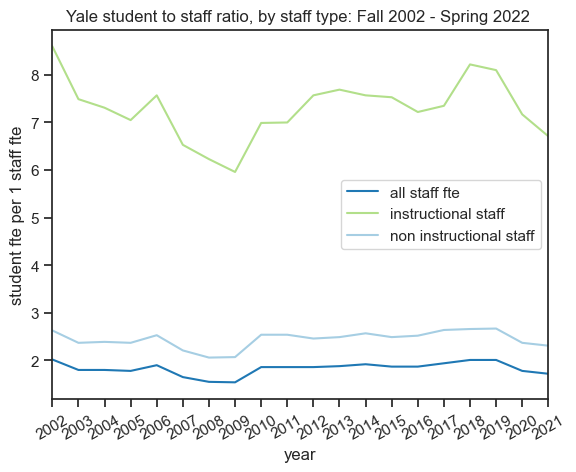

In [58]:
sns.set_theme(style="ticks")
custom_palette = ['#1f78b4','#b2df8a','#a6cee3']
              
yale_student_staff_ratio = sns.lineplot(x='year',y='student fte per staff fte', hue ='type', data=yale_ratio_pct_change_by_type, legend='brief', palette=custom_palette)

plt.ylabel('student fte per 1 staff fte')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['all staff fte','instructional staff','non instructional staff'])
plt.title('Yale student to staff ratio, by staff type: Fall 2002 - Spring 2022 ')
plt.show()

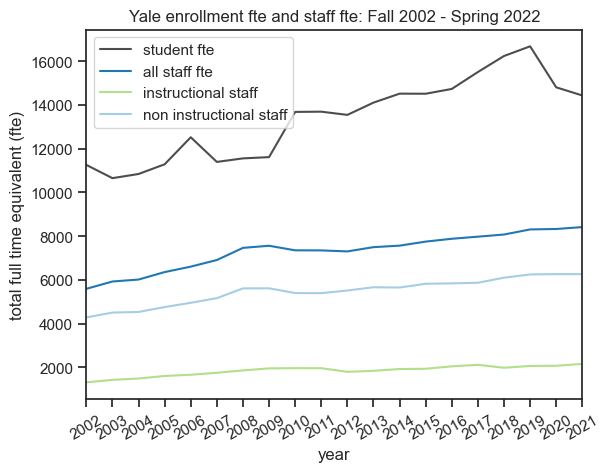

In [59]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
fte_all = sns.lineplot(x='year',y='fte', hue ='type', data=yale_fte_pct_change_by_type, legend='brief', palette=custom_palette)

plt.ylabel('total full time equivalent (fte)')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale enrollment fte and staff fte: Fall 2002 - Spring 2022')
plt.show()

In [62]:
pio.templates.default = "plotly_white"

fig_fte = go.Figure()
fig_fte.add_trace(go.Scatter(x=yale_pct_change["year"],y=yale_pct_change['student fte'],name="student",mode="lines",line=dict(width=3,color='#3b3844')))
fig_fte.add_trace(go.Scatter(x=yale_pct_change["year"],y=yale_pct_change['total staff fte'],name="all staff",mode="lines",line=dict(width=3,color='#142a9c')))
fig_fte.add_trace(go.Scatter(x=yale_pct_change["year"],y=yale_pct_change['total instruction staff fte'],name="instructional staff",mode="lines",line=dict(width=3,color='#a49cbc')))
fig_fte.add_trace(go.Scatter(x=yale_pct_change["year"],y=yale_pct_change['total non instruction staff fte'],name="non instructional staff",mode="lines",line=dict(width=3,color='#b4c6e5')))
fig_fte.update_layout(
    title="Yale student enrollment and full time equivalency (FTE)", xaxis_title="Year", yaxis_title="Total FTE"
)

fig_fte.update_layout(
    autosize=False,
    width=650,
    height=475)

fig_fte.show()
fig_fte.write_html("/Users/ellenruthconnell/Documents/INFO_696/4_visualizations/figure1.html")

IndexError: index 1 is out of bounds for axis 0 with size 1

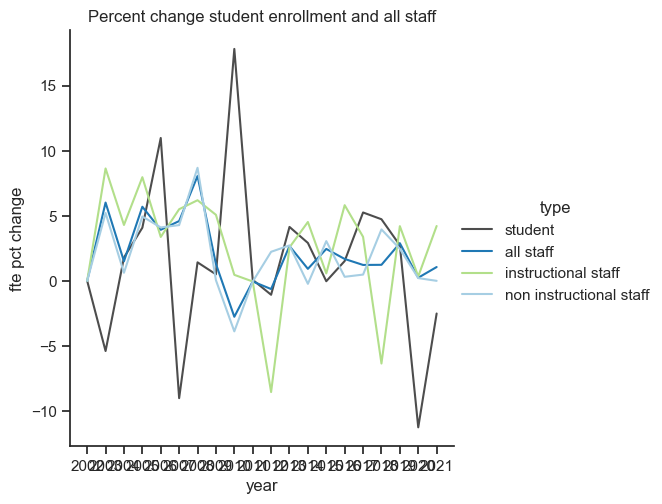

In [63]:
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']

yale_percent_change = sns.relplot(
    data=yale_fte_pct_change_by_type, x='year', y='fte pct change',
    hue='type', legend='brief',
    kind="line",palette=custom_palette,
)

axes = yale_percent_change.axes.flatten()
axes[0].set_title("Percent change student enrollment and all staff")
axes[1].set_title("Percent change staff: instructional vs. non instructional")


yale_percent_change.set_xticklabels(rotation=45)

yale_percent_change._legend.set_title("")


for ax in axes:
    ax.axhline(0, ls='--', linewidth=3, color='grey')

plt.show()

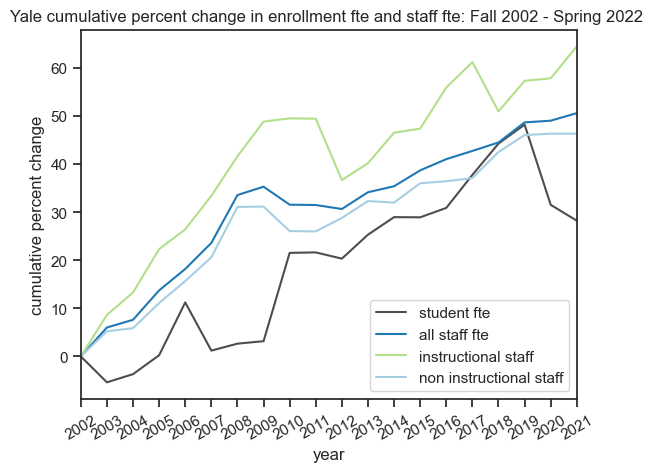

In [ ]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
yale_percent_change_cumul = sns.lineplot(x='year',y='fte pct change cumulative', hue ='type', data=yale_fte_pct_change_by_type, legend='brief', palette=custom_palette)

plt.ylabel('cumulative percent change')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale cumulative percent change in enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()